In [6]:
import numpy as np
import pandas as pd
df=pd.read_csv('winequality-red.csv')
df.head()
df.info()
df.isnull().sum()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
x=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y=df['quality']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)
X_train.shape 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)
X_test_sc

array([[-3.61859850e-01,  1.64286407e-01, -9.85152962e-01, ...,
        -4.65392578e-01, -1.34389336e-04, -7.77452782e-01],
       [-3.03840702e-01, -1.70525408e-01, -5.24491803e-01, ...,
         5.08915214e-01, -1.03143815e+00, -8.72484283e-01],
       [ 1.37871461e+00,  7.78108067e-01, -2.68568937e-01, ...,
        -2.05577167e-01,  1.83329452e+00, -4.92358280e-01],
       ...,
       [-1.37449586e-02,  3.87494284e-01, -1.15015218e-01, ...,
        -1.04997725e+00, -7.44964886e-01, -5.87389780e-01],
       [ 2.76350785e-01, -1.45397070e+00,  6.01568807e-01, ...,
        -1.04997725e+00,  1.71749571e-01,  7.43051230e-01],
       [ 4.50408230e-01,  1.30822677e+00, -1.18989125e+00, ...,
        -1.40623314e-01, -6.87670232e-01, -6.82421281e-01]],
      shape=(320, 11))

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc,y_train)
from sklearn.metrics import precision_score
pre=knn.predict(X_test_sc)
pre

array([5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 7, 6, 6, 5, 5, 7, 5, 5, 7, 5, 4, 6,
       5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 7, 6, 5, 5, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6,
       6, 6, 7, 5, 6, 6, 6, 5, 6, 5, 7, 5, 6, 7, 5, 7, 5, 5, 6, 6, 5, 6,
       7, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       7, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5,
       5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 3, 6, 5, 6, 6, 5, 5,
       6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6,
       6, 5, 6, 5, 5, 7, 6, 7, 5, 6, 6, 6, 7, 6, 6, 6, 5, 7, 6, 5, 5, 6,
       5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 7, 6, 6, 5, 6, 7, 6, 5, 6, 4, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5,
       6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 7, 6, 5, 7,
       6, 7, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 6, 5, 5, 5, 6,
       5, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 7, 6, 7, 6,

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
# accuracy
acc=accuracy_score(y_test,pre)
acc
con_mat=confusion_matrix(y_test,pre)
con_mat
c_report=classification_report(y_test,pre)
c_report

C:\Users\SOUMYOJIT\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\SOUMYOJIT\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\SOUMYOJIT\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00        10\n           5       0.59      0.68      0.63       130\n           6       0.51      0.55      0.53       132\n           7       0.54      0.36      0.43        42\n           8       0.00      0.00      0.00         5\n\n    accuracy                           0.55       320\n   macro avg       0.27      0.26      0.26       320\nweighted avg       0.52      0.55      0.53       320\n'

In [31]:
error_rate = []

for k in range(1, 41, 2):  # odd K values
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, y_train)
    pred_k = knn.predict(X_test_sc)
    error_rate.append(np.mean(pred_k != y_test))
    
for idx, k in enumerate(range(1, 41, 2)):
    print(f"K={k}, Error Rate={error_rate[idx]}")


K=1, Error Rate=0.378125
K=3, Error Rate=0.484375
K=5, Error Rate=0.453125
K=7, Error Rate=0.45
K=9, Error Rate=0.440625
K=11, Error Rate=0.428125
K=13, Error Rate=0.43125
K=15, Error Rate=0.44375
K=17, Error Rate=0.446875
K=19, Error Rate=0.484375
K=21, Error Rate=0.4625
K=23, Error Rate=0.446875
K=25, Error Rate=0.459375
K=27, Error Rate=0.46875
K=29, Error Rate=0.4625
K=31, Error Rate=0.459375
K=33, Error Rate=0.459375
K=35, Error Rate=0.45625
K=37, Error Rate=0.4625
K=39, Error Rate=0.459375


In [32]:
knn_final = KNeighborsClassifier(n_neighbors=3)  # example best K
knn_final.fit(X_train_sc, y_train)

final_pred = knn_final.predict(X_test_sc)
print("Final Accuracy:", accuracy_score(y_test, final_pred))


Final Accuracy: 0.515625


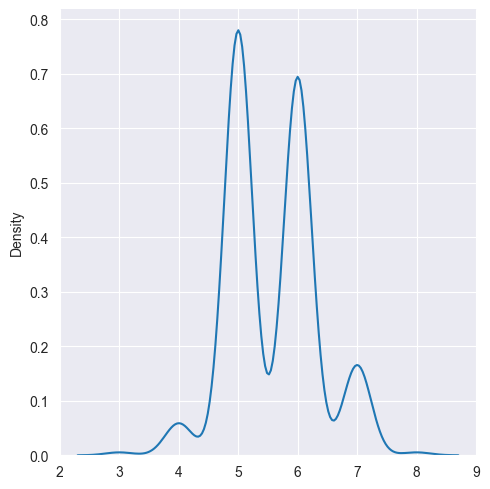

In [38]:
import seaborn as sns
sns.displot(final_pred,kind='kde')
